<a href="https://colab.research.google.com/github/AlenGeorge12/Patient-Readmission-Prediction/blob/main/Patient_Readmission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload `diabetic_data.csv`

import pandas as pd
df = pd.read_csv("diabetic_data.csv")
df.head()


Saving diabetic_data.csv to diabetic_data (1).csv


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Basic info
df.shape
df.info()

# Preview the data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
max_glu_serum,96420
A1Cresult,84748
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
import numpy as np

df.replace('?', np.nan, inplace=True)

# Check again for nulls
df.isnull().sum().sort_values(ascending=False).head(10)

# Drop columns with too many missing values
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)


In [ ]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)


In [ ]:
# Remove rows with 'Unknown/Invalid' gender
df = df[df['gender'] != 'Unknown/Invalid']

# Label encode gender
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


<ipython-input-7-431f347f3857>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('readmitted')  # Target variable

df = pd.get_dummies(df, columns=categorical_cols)


In [ ]:
# Binary target: 1 if readmitted within 30 days, else 0
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Check class balance
df['readmitted'].value_counts(normalize=True)


,proportion
readmitted,
0,0.888398
1,0.111602


In [ ]:
from sklearn.utils import resample

df_majority = df[df['readmitted'] == 0]
df_minority = df[df['readmitted'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced['readmitted'].value_counts()


,count
readmitted,
0,90406
1,90406


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_balanced.drop('readmitted', axis=1)
y = df_balanced['readmitted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Apply to both train and test
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost (already done)
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Run evaluations
print("🔍 Logistic Regression")
evaluate(lr, X_test, y_test)

print("\n🌲 Random Forest")
evaluate(rf, X_test, y_test)

print("\n🚀 XGBoost")
evaluate(xgb, X_test, y_test)


🔍 Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.64     18082
           1       0.63      0.59      0.61     18081

    accuracy                           0.62     36163
   macro avg       0.62      0.62      0.62     36163
weighted avg       0.62      0.62      0.62     36163

Confusion Matrix:
 [[11928  6154]
 [ 7503 10578]]
ROC AUC Score: 0.6761156815737824

🌲 Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18082
           1       1.00      1.00      1.00     18081

    accuracy                           1.00     36163
   macro avg       1.00      1.00      1.00     36163
weighted avg       1.00      1.00      1.00     36163

Confusion Matrix:
 [[18038    44]
 [   23 18058]]
ROC AUC Score: 0.9995674474756797

🚀 XGBoost
Classification Report:
               precision    recall  f1-score   support

 

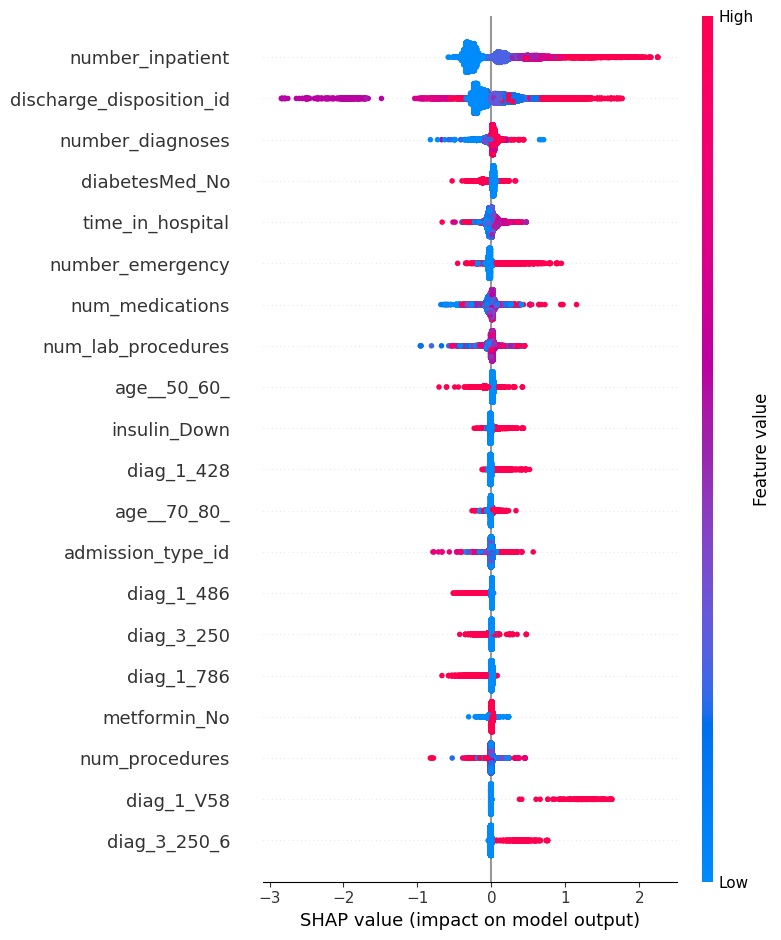

In [ ]:
!pip install shap
import shap

# Use TreeExplainer for tree models (e.g., Random Forest, XGBoost)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


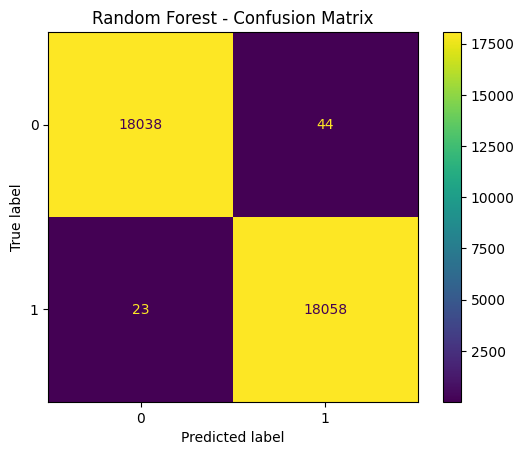

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()


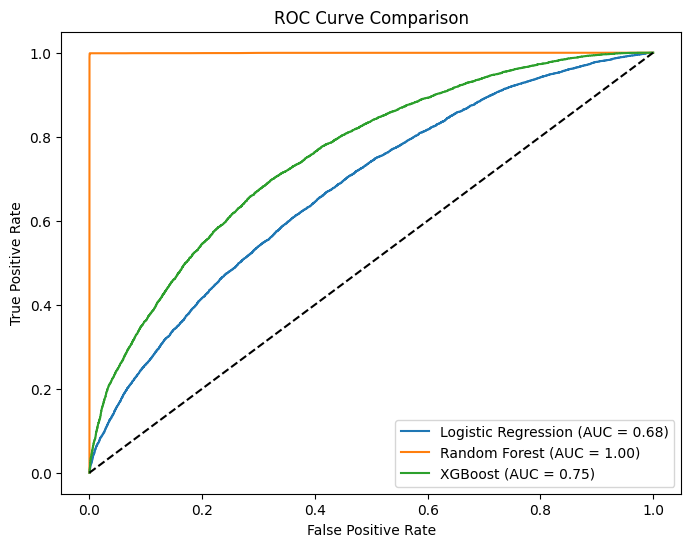

In [ ]:
from sklearn.metrics import roc_curve, auc

models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
